In [1]:
import numpy as np
import matplotlib.pyplot as plt
import faker as Faker
import random
import pandas as pd
import sklearn.preprocessing

In [5]:
reviews = pd.read_csv("Datos_perdidos.csv")
reviews.head(15)

,ID,Longitud (m),Tiempo (s),g (m/s²),Error (m/s²),Planeta 1,Probabilidad 1,Planeta 2,Probabilidad 2,Planeta 3,Probabilidad 3
0,1,1.0,0.45,9.80,0.00,Tierra,100%,Saturno,0%,Urano,0%
1,2,1.0,0.46,9.47,0.33,Tierra,90%,Saturno,10%,Urano,0%
2,3,1.0,0.47,9.14,0.66,Tierra,80%,Saturno,20%,Urano,0%
3,4,1.0,0.48,8.82,0.98,Tierra,70%,Saturno,30%,Urano,0%
4,5,2.0,0.64,9.75,0.05,Tierra,95%,Saturno,5%,Urano,0%
5,6,2.0,0.65,9.54,0.26,Tierra,90%,Saturno,10%,Urano,0%
6,7,2.0,0.66,9.32,0.48,Tierra,85%,Saturno,15%,Urano,0%
7,8,2.0,0.67,9.11,0.69,Tierra,80%,Saturno,20%,Urano,0%
8,9,1.0,0.49,8.50,1.30,Tierra,60%,Saturno,40%,Urano,0%
9,10,1.0,0.48,8.68,1.12,Urano,60%,Saturno,40%,Tierra,0%


Aquí podemos ver como el planeta más probable es la Tierra, y a pesar de que Saturno y Urano están muy empatados, vamos a coger a Saturno como el otro posible porque hay más probabilidades.

In [7]:
'a.- Con una longitud L= 1.00 m cronometran t = 0.46 s. ¿Cuánto vale g y su error?  ¿En qué planeta están, o pueden estar?'
L = 1.00 # m
t = 0.46 # s

delta_t = 0.01 # s
delta_L = 0.01 # m

g = 2*L/t**2

delta_g = np.sqrt((4*delta_L/t**2)**2 + (4*L*delta_t/t**4)**2)

df = pd.DataFrame({'Gravedad': [g], 'Intervalo de error': [delta_g]})

print(df)

   Gravedad  Intervalo de error
0  9.451796            0.913145


Por el intervalo de error sabemos que pueden estar en la Tierra o en Saturno.

In [8]:
'b.- Con una longitud L= 2.00 m cronometran t = 0.66 s. ¿Cuánto vale g y su error?  ¿En qué planeta están, o pueden estar? ¿Con qué probabilidad puedes afirmarlo?'
L = 2.00 # m
t = 0.66 # s

delta_t = 0.01 # s
delta_L = 0.01 # m

g = 2*L/t**2

delta_g = np.sqrt((4*delta_L/t**2)**2 + (4*L*delta_t/t**4)**2)

df = pd.DataFrame({'Gravedad': [g], 'Intervalo de error': [delta_g]})

print(df)

   Gravedad  Intervalo de error
0  9.182736            0.431497


Desde los 2 metros parece que la única posibilidad es Saturno.

In [9]:
experimentos = []
for i in range(1000):
    longitud = round(random.uniform(1, 2.5), 2)
    tiempo = round(random.uniform(0.4, 1), 2)
    g = round(2 * longitud / (tiempo**2), 2)
    if g >= 8.7 and g <= 11.0:
        planeta = 'Saturno'
    else:
        planeta = 'Tierra'
    experimentos.append((i+1, longitud, tiempo, g, planeta))

print("ID,Longitud (m),Tiempo (s),g (m/s²),Planeta")
for exp in experimentos:
    print(f"{exp[0]},{exp[1]},{exp[2]},{exp[3]},{exp[4]}")


ID,Longitud (m),Tiempo (s),g (m/s²),Planeta
1,2.27,0.83,6.59,Tierra
2,1.64,0.91,3.96,Tierra
3,1.76,0.67,7.84,Tierra
4,1.35,0.58,8.03,Tierra
5,2.37,0.98,4.94,Tierra
6,2.32,0.5,18.56,Tierra
7,2.27,0.61,12.2,Tierra
8,1.41,0.9,3.48,Tierra
9,2.03,0.41,24.15,Tierra
10,2.25,0.58,13.38,Tierra
11,1.78,0.81,5.43,Tierra
12,1.68,0.74,6.14,Tierra
13,2.18,0.54,14.95,Tierra
14,1.44,0.79,4.61,Tierra
15,1.56,0.48,13.54,Tierra
16,1.27,0.49,10.58,Saturno
17,2.2,0.41,26.17,Tierra
18,1.21,0.8,3.78,Tierra
19,1.91,0.82,5.68,Tierra
20,1.05,0.99,2.14,Tierra
21,2.01,0.97,4.27,Tierra
22,2.05,0.49,17.08,Tierra
23,1.44,0.62,7.49,Tierra
24,2.25,0.41,26.77,Tierra
25,1.18,0.76,4.09,Tierra
26,2.14,0.84,6.07,Tierra
27,1.73,0.72,6.67,Tierra
28,2.21,0.67,9.85,Saturno
29,1.48,0.57,9.11,Saturno
30,1.27,0.9,3.14,Tierra
31,1.89,0.48,16.41,Tierra
32,1.52,0.96,3.3,Tierra
33,2.17,0.41,25.82,Tierra
34,2.21,0.44,22.83,Tierra
35,2.39,0.43,25.85,Tierra
36,1.52,0.56,9.69,Saturno
37,1.44,0.72,5.56,Tierra
38,1.65,0.54,11.32,Tierra
39,

       Longitud (m)   Tiempo (s)     g (m/s²)
count   1000.000000  1000.000000  1000.000000
mean       1.747000     0.701260     8.737310
std        0.432108     0.171178     5.503647
min        1.000000     0.400000     2.100000
25%        1.390000     0.560000     4.720000
50%        1.750000     0.700000     7.000000
75%        2.120000     0.850000    11.080000
max        2.500000     1.000000    29.630000


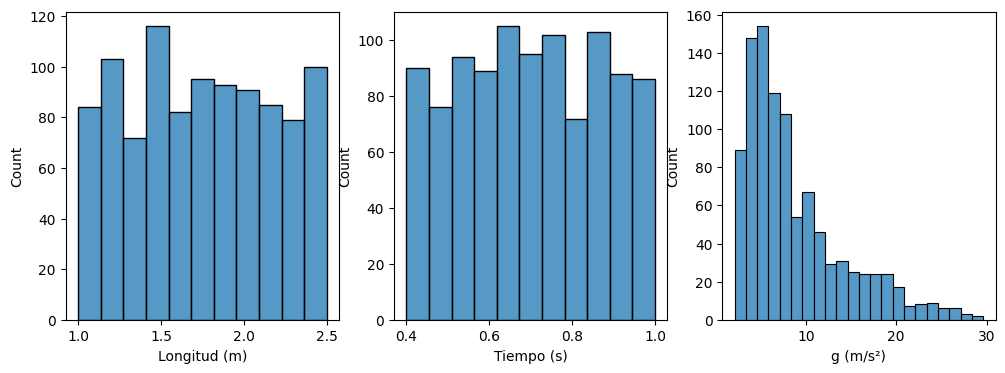

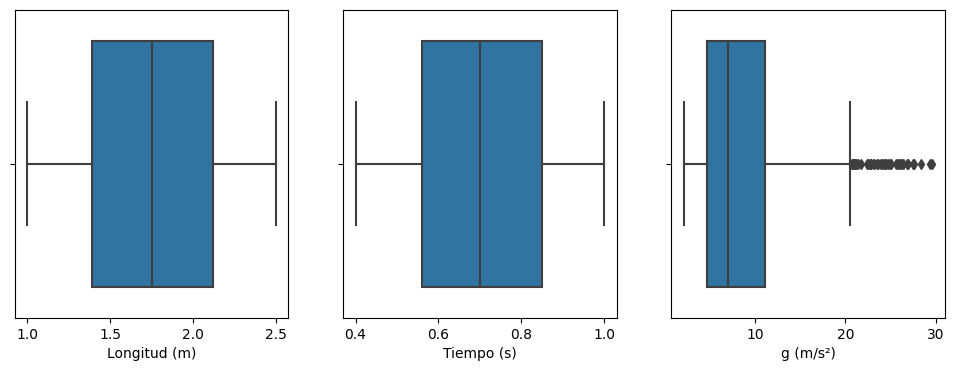

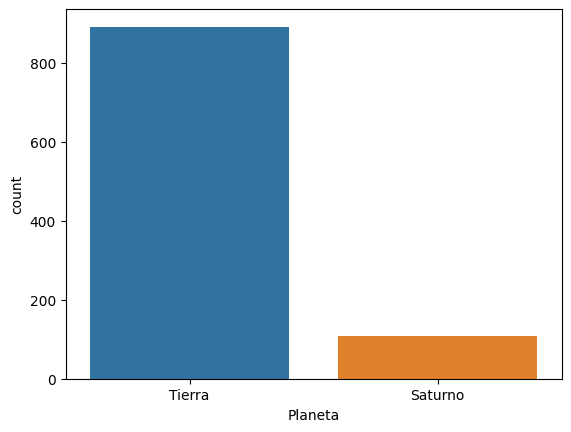

Planeta
Tierra     891
Saturno    109
Name: count, dtype: int64


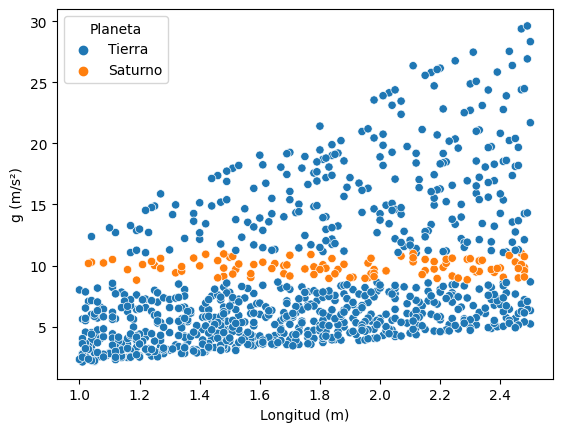

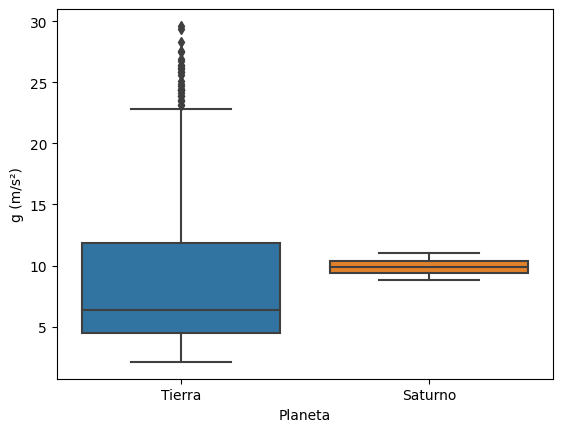

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(experimentos, columns=['ID', 'Longitud (m)', 'Tiempo (s)', 'g (m/s²)', 'Planeta'])

print(df[['Longitud (m)', 'Tiempo (s)', 'g (m/s²)']].describe())

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
sns.histplot(data=df, x='Longitud (m)', ax=ax[0])
sns.histplot(data=df, x='Tiempo (s)', ax=ax[1])
sns.histplot(data=df, x='g (m/s²)', ax=ax[2])
plt.show()

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
sns.boxplot(data=df, x='Longitud (m)', ax=ax[0])
sns.boxplot(data=df, x='Tiempo (s)', ax=ax[1])
sns.boxplot(data=df, x='g (m/s²)', ax=ax[2])
plt.show()

sns.countplot(data=df, x='Planeta')
plt.show()

print(df['Planeta'].value_counts())

sns.scatterplot(data=df, x='Longitud (m)', y='g (m/s²)', hue='Planeta')
plt.show()

sns.boxplot(data=df, x='Planeta', y='g (m/s²)')
plt.show()